**World Happiness Index part 2**

In [1]:
import tensorflow as tf
import pandas as pd
loaded_model=tf.keras.models.load_model("world_happy_index")



In [2]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                1770      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [3]:
happy_index=pd.read_csv("world-happiness-report-2021.csv")
happy_index

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [4]:
x=happy_index.drop('Country name',axis=1)
y=happy_index['Country name']
x1=pd.get_dummies(x)
x1

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,...,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,...,0,0,0,0,0,0,0,0,0,1
1,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,...,0,0,0,0,0,0,0,0,0,1
2,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,...,0,0,0,0,0,0,0,0,0,1
3,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,...,0,0,0,0,0,0,0,0,0,1
4,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,...,0,0,0,0,0,0,0,0,1,0
145,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,...,0,0,0,0,0,0,0,0,1,0
146,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,...,0,0,0,0,0,0,0,0,1,0
147,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,...,0,0,0,0,0,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.4,random_state=0)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

ohe=OneHotEncoder()
imp=SimpleImputer()


ct=make_column_transformer(
                          (imp,['Ladder score','Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual']),
                          remainder='passthrough')

ct.fit(x_train)
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

le=preprocessing.LabelEncoder()
le.fit(y_train)
trans=le.transform(y_train)
trans
le1=preprocessing.LabelEncoder()
le1.fit(y_test)
trans1=le1.transform(y_test)
trans1

array([30, 52, 10, 27, 24, 38, 58, 36, 51, 17, 46, 19, 35, 53, 23, 12, 13,
       37, 54, 43, 39, 34,  1, 29, 40, 15,  8, 48, 42, 25, 16, 14, 50, 31,
       55, 33, 59, 47,  9, 49, 44,  2,  0,  7, 26, 28, 21, 57, 32, 11, 20,
        3,  6,  4, 22, 18, 41, 56,  5, 45])

In [7]:
trans.dtype

dtype('int64')

In [8]:
x_train_normal

array([[5.339, 0.029, 5.397, ..., 0.   , 0.   , 0.   ],
       [5.269, 0.07 , 5.406, ..., 0.   , 0.   , 0.   ],
       [4.574, 0.064, 4.7  , ..., 0.   , 1.   , 0.   ],
       ...,
       [5.723, 0.046, 5.813, ..., 0.   , 0.   , 1.   ],
       [4.721, 0.055, 4.828, ..., 0.   , 0.   , 0.   ],
       [6.078, 0.053, 6.181, ..., 0.   , 0.   , 0.   ]])

In [9]:
x_train

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,...,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
83,5.339,0.029,5.397,5.281,9.673,0.811,69.593,0.904,-0.146,0.755,...,0,0,1,0,0,0,0,0,0,0
86,5.269,0.070,5.406,5.132,8.120,0.774,64.233,0.782,0.152,0.727,...,0,0,0,0,0,0,1,0,0,0
123,4.574,0.064,4.700,4.448,9.161,0.818,56.799,0.719,-0.149,0.847,...,0,0,0,0,0,0,0,0,1,0
98,5.045,0.073,5.189,4.901,8.087,0.489,54.713,0.757,-0.034,0.661,...,0,0,0,0,0,0,0,0,1,0
122,4.584,0.055,4.691,4.477,9.626,0.848,67.355,0.525,-0.073,0.898,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,0.042,0.481,...,0,0,0,0,0,0,0,0,0,1
103,4.948,0.046,5.038,4.857,10.240,0.822,67.199,0.576,-0.139,0.776,...,0,0,0,0,1,0,0,0,0,0
67,5.723,0.046,5.813,5.632,10.279,0.823,72.600,0.582,-0.288,0.823,...,0,0,0,0,0,0,0,0,0,1
117,4.721,0.055,4.828,4.614,9.584,0.710,66.300,0.608,0.218,0.714,...,0,0,0,0,1,0,0,0,0,0


In [10]:
#main
#turning into numpy to prevent errors
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])
model.fit(x_train_normal,trans,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 49.4281 - mae: 49.4281
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 23.9085 - mae: 23.9085
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 25.3723 - mae: 25.3723
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 23.1715 - mae: 23.1715
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 23.1943 - mae: 23.1943
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 23.0844 - mae: 23.0844
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 23.0993 - mae: 23.0993
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 23.6872 - mae: 23.6872
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 23.5399 - mae: 23.5399
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 28.8389 - mae: 28.8389
Epoch 11/100
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 24.4749 - mae: 24.4749
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 23.4988 - mae: 23.4988
Epoch 89/100
3/3 [==============================] - 0s 2ms/step - loss: 22.2209 - mae: 22.2209
Epoch 90/100
3/3 [==============================] - 0s 2ms/step - loss: 22.7397 - mae: 22.7397
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 22.5161 - mae: 22.5161
Epoch 92/100
3/3 [==============================] - 0s 3ms/step - loss: 25.2245 - mae: 25.2245
Epoch 93/100
3/3 [==============================] - 0s 2ms/step - loss: 23.9296 - mae: 23.9296
Epoch 94/100
3/3 [==============================] - 0s 2ms/step - loss: 23.0413 - mae: 23.0413
Epoch 95/100
3/3 [==============================] - 0s 2ms/step - loss: 22.2974 - mae: 22.2974
Epoch 96/100
3/3 [==============================] - 0s 3ms/step - loss: 24.4277 - mae: 24.4277
Epoch 97/100
3/3 [==============================] - 0s 2ms/step

In [11]:
model.evaluate(x_test_normal,trans1)

2/2 [==============================] - 0s 2ms/step - loss: 16.6100 - mae: 16.6100


[16.609996795654297, 16.609996795654297]

In [12]:
y_pred=model.predict(x_test_normal)

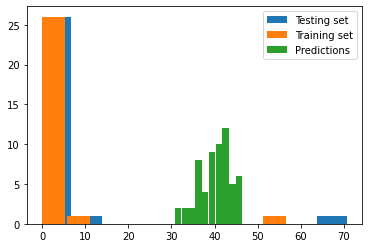

In [27]:
import matplotlib.pyplot as plt
bins=[10,20,30,40,50,60,70]
plt.hist(x_test_normal[2],rwidth=0.95,label="Testing set")
plt.hist(x_train_normal[2],rwidth=0.95,label="Training set")
plt.hist(y_pred,rwidth=0.95,label="Predictions")
plt.legend();

**Here 'trans' and 'trans1' are labels 'whereas x_train_normal' and 'x_test_normal' are features**